# An introduction into the tools and tutorials available for the analysis of TESS data

Welcome everyone to this *TESS* Lightkurve tutorial!

## Authors

[Rebekah Hounsell](https://heasarc.gsfc.nasa.gov/docs/tess/helpdesk.html) - Support scientist for *TESS* in the NASA GSFC GI Office. 

Rachel Huchmala - Edited standard tutorial to reflect HAT-P-37b data (04/07/2025)

## Learning Goals

In this tutorial, we will teach the user how to access, analyze, and manipulate data from the NASA Exoplanet mission *TESS* (this can also be applied to *Kepler* & *K2*). All tools presented will teach the user how to work with time series data for the purpose of scientific research. 

The tutorial assumes a basic knowledge of python and astronomy, and will walk the user through several of the concepts outlined below:

1. How to obtain *TESS* data products from the MAST archive
2. How to use *Lightkurve* to access the various data products and create time series
3. How to analyze and assess various data anomalies and how you might visualize them

## Imports

This tutorial requires the use of specific packages:
- [**Lightkurve**](https://docs.lightkurve.org/index.html) to work with *TESS* data (v2.0.1)
- [**Matplotlib**](https://matplotlib.org/) for plotting.
- [**Numpy**](https://numpy.org) for manipulating the data.

In [ ]:
import os  # added os to support interactive mode
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### First time users

If you are not that experienced with *Python*, or cannot download *Lightkurve*, you can run this notebook as a [Colab notebook](https://colab.research.google.com/notebooks/intro.ipynb?utm_source=scs-index). Colaboratory allows users to write and execute *Python* in your browser with zero configuration required. 

All you need is a Google account and to copy and paste in the following command at the top of your colab notebook:

`!pip install lightkurve`

This downloads the *Lightkurve* package.

## Introduction to *TESS*: 

The *Transiting Exoplanet Survey Satellite (TESS)* is a NASA-sponsored Astrophysics Explorer-class mission that is performing a near all-sky survey to search for planets transiting nearby stars. *TESS* completed its primary mission in July of 2020, and has now entered its extended mission. The current extended mission will last until September 2022, and will continue to scan the sky for exoplanets and transient events. The *TESS* mission is now more community focused with a larger guest investigator (GI) program.

Over the last three years *TESS* has observed both the northern and southern hemispheres, with each hemisphere being split into ~13 sectors. Each sector is observed for ~27 days by *TESS's* four cameras.

The main data products collected by the *TESS* mission are described below. 

- [Full Frame Images (FFIs)](https://heasarc.gsfc.nasa.gov/docs/tess/data-products.html#full-frame-images): The full sector images, with a cadence of 30-min (years 1 & 2) or 10-min (years 3 & 4).
- [Target Pixel Files (TPFs)](https://heasarc.gsfc.nasa.gov/docs/tess/data-products.html#target-pixel-files-tpfs): Postage stamp cut outs from the FFIs, focused on a selected target of interest. Each stamp has a cadence of 2-min or 20-sec. 
- [Light Curve Files (LCFs)](https://heasarc.gsfc.nasa.gov/docs/tess/data-products.html#light-curve-files): The time series data produced for each 2-min or 20-sec TPF object. 

To learn more about the *TESS* mission and its data products, please visit the [*TESS* GI pages](https://heasarc.gsfc.nasa.gov/docs/tess/data-products.html).

## 1. How to obtain *TESS* data products from the MAST archive

You can access *TESS*, *Kepler*, and *K2* data via the [ Mikulksi Archive for Space Telescopes (MAST)](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html) archive or via the *Lightkurve* package (see Section 2).

Here, we are focusing on obtaining your data via the MAST portal. Using the portal, you can enter the name of your object, its TIC number, or position (i.e., R.A and Dec). If listed in the archive, the table containing each observation will be returned.

## 2. How to use *Lightkurve* to access the various data products and create a time series


[*Lightkurve*](https://docs.lightkurve.org/tutorials/index.html) offers a user-friendly way to analyze time series data obtained by telescopes, in particular *NASA’s Kepler* and *TESS* exoplanet missions. You can search for the various data products for *TESS* on MAST using the following *Lightkurve* functions:

- To look for your object in a full frame image: [`search_tesscut()`](https://docs.lightkurve.org/reference/api/lightkurve.search_tesscut.html?highlight=search_tesscut)

- To look for target pixel files:  [`search_targetpixelfile()`](https://docs.lightkurve.org/reference/api/lightkurve.search_targetpixelfile.html?highlight=search_targetpixelfile) 

- To obtain light curve files for your object of interest: [`search_lightcurve()`](https://docs.lightkurve.org/reference/api/lightkurve.search_lightcurve.html?highlight=search_lightcurve) 

For the purpose of this tutorial, we will be examining [L 98-59](https://arxiv.org/pdf/1903.08017.pdf), a bright M dwarf star at a distance of 10.6 pc. This star is host to three terrestrial-sized planets and is also known in the *TESS* system as TIC 307210830. 

### 2.1 Accessing the data products

Let's go through each one of the above functions and see what data is available.

In [18]:
search_ffi = lk.search_tesscut('HAT-P-37 b')
search_tpf = lk.search_targetpixelfile('HAT-P-37 b')
search_lcf = lk.search_lightcurve('HAT-P-37 b')

In [19]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 15,2019,TESScut,1426,HAT-P-37 b,0.0
1,TESS Sector 14,2019,TESScut,1426,HAT-P-37 b,0.0
2,TESS Sector 26,2020,TESScut,1426,HAT-P-37 b,0.0
3,TESS Sector 41,2021,TESScut,475,HAT-P-37 b,0.0
4,TESS Sector 40,2021,TESScut,475,HAT-P-37 b,0.0
5,TESS Sector 59,2022,TESScut,158,HAT-P-37 b,0.0
6,TESS Sector 53,2022,TESScut,475,HAT-P-37 b,0.0
7,TESS Sector 54,2022,TESScut,475,HAT-P-37 b,0.0
8,TESS Sector 55,2022,TESScut,475,HAT-P-37 b,0.0


The above table provides several important pieces of information: 
- The sector in which the object was observed.
- The year in which the object was observed.
- The author of the data. This has multiple options and each is a hyperlink that when clicked will provide you with more information. 
- The cadence of the observation. 
- The name of the target.
- The distance of the observation from your target of interest. This is useful if you conduct a cone search around your objects co-ordinates. 

The table above indicates that our object was observed in multiple sectors. Note that in years 1 and 2 (2018 & 2019) that the cadence of the FFI data was 30-min, but in year 3 (2020/2021) it is 10-min.

Let's see if any other data exists - i.e., was it observed as a target of interest and does it have a Target Pixel File. 

In [20]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 26,2020,SPOC,120,267572272,0.0
1,TESS Sector 40,2021,SPOC,120,267572272,0.0
2,TESS Sector 41,2021,SPOC,120,267572272,0.0
3,TESS Sector 53,2022,SPOC,120,267572272,0.0
4,TESS Sector 54,2022,SPOC,120,267572272,0.0
5,TESS Sector 55,2022,SPOC,120,267572272,0.0
6,TESS Sector 59,2022,SPOC,120,267572272,0.0
7,TESS Sector 80,2024,SPOC,20,267572272,0.0
8,TESS Sector 75,2024,SPOC,20,267572272,0.0


Great! Our object was observed as a target of interest and has 2-min and 20-sec cadenced data. This means that there should be light curve files already on the archive. Let's check those out. 

In [21]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 26,2020,SPOC,120,267572272,0.0
1,TESS Sector 41,2021,SPOC,120,267572272,0.0
2,TESS Sector 40,2021,SPOC,120,267572272,0.0
3,TESS Sector 54,2022,SPOC,120,267572272,0.0
4,TESS Sector 55,2022,SPOC,120,267572272,0.0
5,TESS Sector 59,2022,SPOC,120,267572272,0.0
6,TESS Sector 53,2022,SPOC,120,267572272,0.0
7,TESS Sector 80,2024,SPOC,20,267572272,0.0
8,TESS Sector 75,2024,SPOC,20,267572272,0.0


Wonderful! Light curves for our object of interest have already been created. 

### 2.2 Creating a light curve using a Light Curve File: 

Now on to getting the light curve for our object of interest. From the above table, it looks like there are multiple authors for our target. For the purpose of this tutorial, let's stick to "SPOC" data products which have a 2-min cadence. We can return only these results using the following commands.

In [22]:
search_lcf_refined = lk.search_lightcurve('HAT-P-37', author="SPOC", exptime=120)
search_lcf_refined 

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 26,2020,SPOC,120,267572272,0.0
1,TESS Sector 40,2021,SPOC,120,267572272,0.0
2,TESS Sector 41,2021,SPOC,120,267572272,0.0
3,TESS Sector 53,2022,SPOC,120,267572272,0.0
4,TESS Sector 54,2022,SPOC,120,267572272,0.0
5,TESS Sector 55,2022,SPOC,120,267572272,0.0
6,TESS Sector 59,2022,SPOC,120,267572272,0.0
7,TESS Sector 74,2024,SPOC,120,267572272,0.0
8,TESS Sector 75,2024,SPOC,120,267572272,0.0


We now see five (24 as of 04/07/2025) search results. Let's download these and see what the light curve looks like.

In [23]:
lcf = search_lcf_refined.download_all()

In [24]:
lcf

LightCurveCollection of 11 objects:
    0: <TessLightCurve LABEL="TIC 267572272" SECTOR=26 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 267572272" SECTOR=40 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    2: <TessLightCurve LABEL="TIC 267572272" SECTOR=41 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    3: <TessLightCurve LABEL="TIC 267572272" SECTOR=53 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    4: <TessLightCurve LABEL="TIC 267572272" SECTOR=54 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    5: <TessLightCurve LABEL="TIC 267572272" SECTOR=55 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    6: <TessLightCurve LABEL="TIC 267572272" SECTOR=59 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    7: <TessLightCurve LABEL="TIC 267572272" SECTOR=74 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    8: <TessLightCurve LABEL="TIC 267572272" SECTOR=75 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    9: <TessLightCurve LABEL="TIC 267572272" SECTOR=80 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    10: <TessLightCurve LABEL="TIC 267572272

This has downloaded the light curve for each sector, and stored the data in arrays. You can look at the data for a specific sector by specifying an array number as indicated below. This displays the data for sector 2 as a table.

In [ ]:
# switch to sector 82 data - best PDCSAP data
lcf[3]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2743.9978020298267,1.3270039e+03,7.4637332e+00,1.2980726e-03,1091910,814.36131,1758.48536,1.2595660e+03,4.5364170e+00,2.8099976e+02,1.2568010e+00,1.3270039e+03,7.4637332e+00,0,———,———,———,———,814.36131,1.7170425e-03,1758.48536,1.7478738e-03,-2.1109963e-02,5.0702587e-02
2743.9991909402943,1.3294330e+03,7.4703698e+00,1.2980949e-03,1091911,814.36205,1758.48389,1.2606967e+03,4.5404506e+00,2.8185788e+02,1.2579852e+00,1.3294330e+03,7.4703698e+00,0,———,———,———,———,814.36205,1.7187145e-03,1758.48389,1.7478162e-03,-1.8952426e-02,4.4763945e-02
2744.0005798506454,1.3074729e+03,7.4349413e+00,1.2981170e-03,1091912,814.35963,1758.48295,1.2467263e+03,4.5189171e+00,2.7977267e+02,1.2573570e+00,1.3074729e+03,7.4349413e+00,0,———,———,———,———,814.35963,1.7275671e-03,1758.48295,1.7584945e-03,-2.0298842e-02,5.2077379e-02
2744.0019687609956,1.3246611e+03,7.4497533e+00,1.2981391e-03,1091913,814.36088,1758.48389,1.2559640e+03,4.5279193e+00,2.7946356e+02,1.2558125e+00,1.3246611e+03,7.4497533e+00,0,———,———,———,———,814.36088,1.7188939e-03,1758.48389,1.7494230e-03,-1.9061171e-02,4.6973743e-02
2744.003357671345,1.3292565e+03,7.4595032e+00,1.2981612e-03,1091914,814.36168,1758.48309,1.2577062e+03,4.5338454e+00,2.8032941e+02,1.2564906e+00,1.3292565e+03,7.4595032e+00,0,———,———,———,———,814.36168,1.7189089e-03,1758.48309,1.7493082e-03,-1.9800195e-02,5.0299559e-02
2744.00752440228,1.3349402e+03,7.4543552e+00,1.2982275e-03,1091917,814.35944,1758.48139,1.2539607e+03,4.5307164e+00,2.8194745e+02,1.2570299e+00,1.3349402e+03,7.4543552e+00,0,———,———,———,———,814.35944,1.7221879e-03,1758.48139,1.7531188e-03,-2.1918783e-02,2.4927879e-02
2744.0103022227486,1.3292877e+03,7.4407635e+00,1.2982715e-03,1091919,814.35301,1758.48442,1.2447823e+03,4.5224557e+00,2.8349692e+02,1.2583505e+00,1.3292877e+03,7.4407635e+00,0,———,———,———,———,814.35301,1.7287581e-03,1758.48442,1.7627057e-03,-2.6978096e-02,2.2671752e-02
2744.013080043216,1.3282048e+03,7.4354157e+00,1.2983155e-03,1091921,814.35963,1758.48763,1.2444406e+03,4.5192056e+00,2.8295947e+02,1.2574992e+00,1.3282048e+03,7.4354157e+00,0,———,———,———,———,814.35963,1.7314898e-03,1758.48763,1.7620422e-03,-2.2837019e-02,5.5861514e-02


In this table, you are given the time and the flux for your object of interest.
There does however seem to be three entries for flux: flux, sap_flux, and pdcsap_flux. 
By default the flux = pdcsap_flux, but what do these entries mean?

- **Simple Aperture Photometry (SAP)**:  The SAP light curve is calculated by summing together the brightness of pixels that fall within an aperture set by the *TESS* mission. This is often referred to as the *optimal aperture*, but in spite of its name, it can sometimes be improved upon! Because the SAP light curve is a sum of the brightness in chosen pixels, it is still subject to systematic artifacts of the mission.

- **Pre-search Data Conditioning SAP flux (PDCSAP) flux**: SAP flux from which long term trends have been removed using so-called Co-trending Basis Vectors (CBVs). PDCSAP flux is usually cleaner data than the SAP flux and will have fewer systematic trends.


You can switch between fluxes using the following commands,

    pdcsap = lcf[0].pdcsap_flux
    
    sapflux = lcf[0].sap_flux

Let's now plot both the pdcsap and sap light curves and see what they look like.

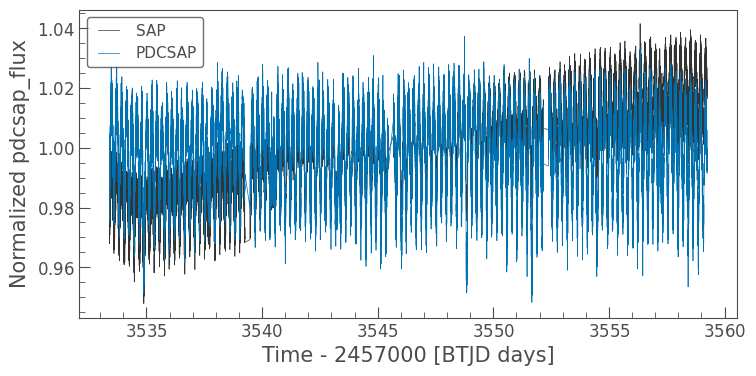

In [47]:
ax = lcf[10].plot(column='sap_flux', normalize=True, label="SAP");
lcf[10].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

There are some big differences between these two light curves, specifically the dips in the SAP light curve and its overall gradent. These differences are caused by scattered light and other noise issues. For more information refer to [these tutorials](https://docs.lightkurve.org/tutorials/index.html#removing-instrumental-noise). For now, let's think about how we can manipulate the light curves.

#### 2.2.1 Manipulating a light curve:

There are a set of useful functions in *Lightkurve* which you can use to work with the data. 
These include:

- [flatten()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.flatten.html?highlight=flatten#lightkurve.LightCurve.flatten): Remove long term trends using a Savitzky–Golay filter
- [remove_outliers()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.remove_outliers.html?highlight=remove_outliers): Remove outliers using simple sigma clipping
- [remove_nans()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.remove_nans.html?highlight=remove_nans): Remove infinite or NaN values (these can occur during thruster firings)
- [fold()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.fold.html?highlight=fold): Fold the data at a particular period
- [bin()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.bin.html?highlight=bin): Reduce the time resolution of the array, taking the average value in each bin.

We can use these simply on a light curve object. For this tutorial lets stick with the PDCSAP flux.

Text(0.5, 1.0, 'PDCSAP light curve of  HAT-P-37 b')

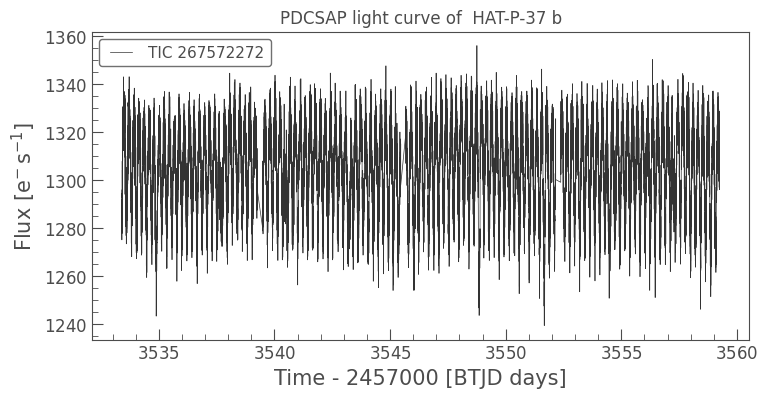

In [57]:
ax = lcf[10].plot() 
ax.set_title("PDCSAP light curve of  HAT-P-37 b")

#### Flattening 

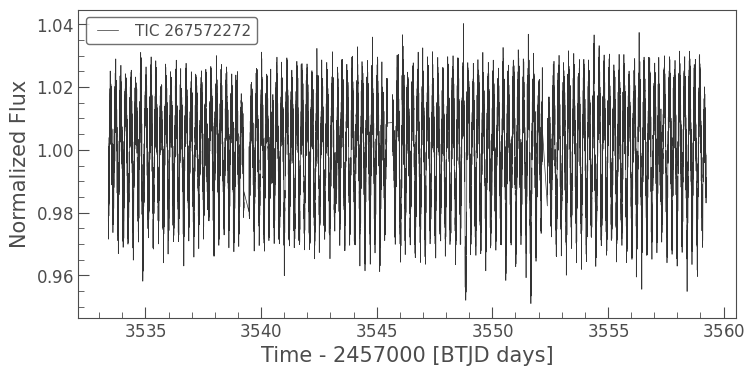

In [58]:
flat_lc = lcf[10].flatten(window_length=401)
flat_lc.plot();

#### Folding the light curve
From the [L 98-59 System](https://arxiv.org/pdf/1903.08017.pdf) paper, we know that planet c has a period of 3.690621 days. We can use the `fold()` function to find the transit in our data as shown below.

For HAT-P-37, we know that planet b has a period of 2.79744256±0.00000041 from the Kokori et al 2023 paper.

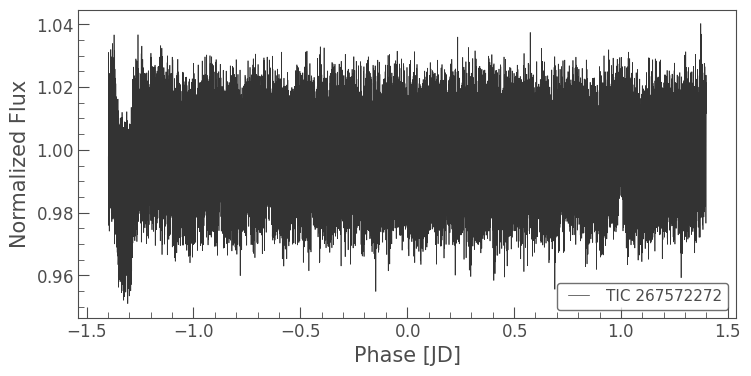

In [59]:
folded_lc = flat_lc.fold(period=2.79744256)
folded_lc.plot();

#### Binning the light curve
Often, to see a trend, it can be beneficial to bin the data, this can be achieved via the `bin()` function.

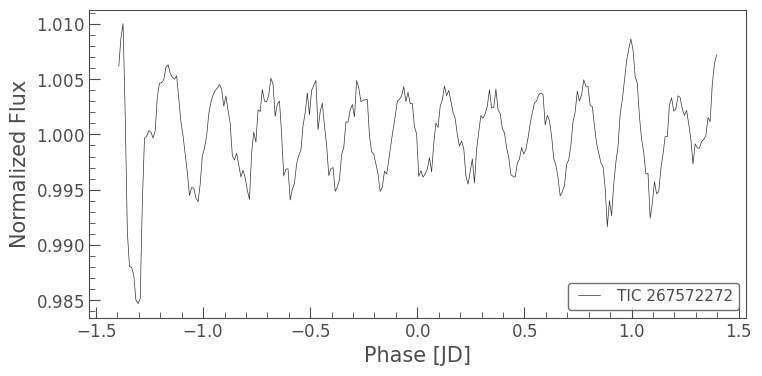

In [60]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot();

Great, we can now see our transit very clearly! Note that we can achieve the same plot from our data using one line of code instead of several, see below.

`lcf[0].flatten(window_length=401).fold(period=3.690621).bin(time_bin_size=0.01).plot();`

#### Interact with your light curve

There is also an interactive tool for light curves called `.interact_bls`. Box Least Squares (BLS), is a method for identifying transit signals in a light curve.

The `.interact_bls` method allows you to identify periodic transit signals in light curves by manually selecting the period and duration of the signal.

In [65]:
# run this cell so the interactive methods work
os.environ["BOKEH_ALLOW_WS_ORIGIN"] = 'localhost:8888' # may need to swap order
os.environ["BOKEH_ALLOW_WS_ORIGIN"] = '09stgk50ejj1hrqbelni0hhb1t8u7g3qbti9a5837s0aqdtqlpf0'

In [66]:
lcf[10].interact_bls()

The light curve in the top right panel is phase-folded with the highest power period. When you zoom in on a region of period space in the BLS periodogram, it will automatically update the phase plot with the new period-at-max-power. Changing the duration using the slider in the bottom left will also update the BLS periodogram and phase-folded light curve. Finally, the parameters of the BLS model can be found in the bottom right panel.

What if your object is not a target of interest but simply observed within the full framed images? You can still extract the data and create a 30-min or 10-min cadenced light curve.

### 2.3 Creating a light curve using FFI data:

In our previous FFI search, we found that *L 98-59* was observed in Sector 2 with a 30-min cadence. This data is stored as the 2nd argument of the *search_ffi* array. 

To create the light curve from the FFI data, we must first download the relevant images. Note that we do not want the entirety of the Sector 2 FFI, only a small region surrounding our object of interest. We can specify the size of the region we want to cut out using the commands below; in this case we want a 10x10 pixel region.

In [ ]:
# rerun ffi_data with L 98-59 for now
search_ffi = lk.search_tesscut('L 98-59')

In [72]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 05,2018,TESScut,1426,L 98-59,0.0
1,TESS Sector 01,2018,TESScut,1426,L 98-59,0.0
2,TESS Sector 02,2018,TESScut,1426,L 98-59,0.0
3,TESS Sector 10,2019,TESScut,1426,L 98-59,0.0
4,TESS Sector 11,2019,TESScut,1426,L 98-59,0.0
5,TESS Sector 12,2019,TESScut,1426,L 98-59,0.0
6,TESS Sector 08,2019,TESScut,1426,L 98-59,0.0
7,TESS Sector 09,2019,TESScut,1426,L 98-59,0.0
8,TESS Sector 32,2020,TESScut,475,L 98-59,0.0


In [77]:
ffi_data = search_ffi[2].download(cutout_size=10)

Let's now see what this cut out looks like and also check that our object is at the center of it.

<Axes: title={'center': 'Target ID: L 98-59, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

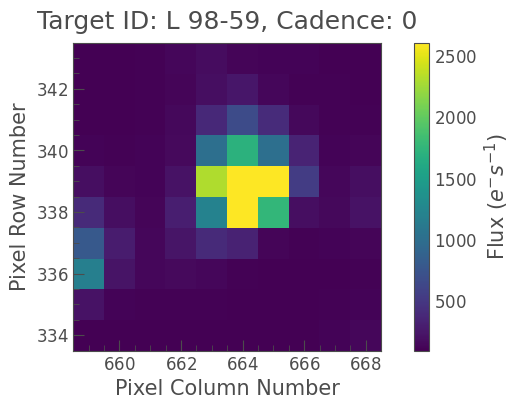

In [78]:
ffi_data.plot()

The above figure indicates the pixels on the CCD camera, with which *L 98-59* was observed. The color indicates the amount of flux in each pixel, in electrons per second. The y-axis shows the pixel row, and the x-axis shows the pixel column. The title tells us the *TESS* Input Catalogue ([TIC](https://tess.mit.edu/science/tess-input-catalogue/)) identification number of the target, and the observing cadence of this image. By default, `plot()` shows the first observation cadence in the Sector.

It looks like our star is isolated, so we can extract a light-curve by simply summing up all the pixel values in each image. To do this, we need to first define an **aperture mask**. 

Many decisions go into the choice of aperture mask, including the significant blending of the large *TESS* pixels. In this tutorial, we are going to define an aperture by defining a median flux value and only selecting pixels at a certain sigma above that threshold. 

In most situations, a threshold mask will be the best choice for custom aperture photometry, as it doesn’t involve trial and error beyond finding the best sigma value. You can define a threshold mask using the following code:

In [79]:
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

np.int64(9)

This indicates that there are 9 pixels which are above our threshold and in our mask. We can now check to make sure that our target is covered by this mask using plot.

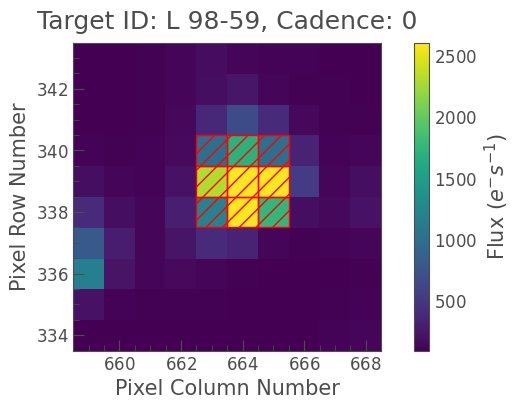

In [80]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

Nice! We see our target mask centered on the 9 brightest pixels in the center of the image. Let’s see what the light curve looks like. Note that this light curve will be uncorrected for any anomalies or noise, and that the flux is therefore based upon “Simple Aperture Photometry” (SAP).

To create our light curve we will pass our **aperture_mask** to the [`to_lightcurve`](https://docs.lightkurve.org/reference/api/lightkurve.KeplerTargetPixelFile.to_lightcurve.html?highlight=to_lightcurve) function.

In [81]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

Once again, we can examine the light curve data as a table, but note this time that there is only one flux value and that as default this is the SAP flux.

In [83]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int64,int32
1354.1355100037465,20954.431640625,3.968478202819824,664.053236257685,338.870953330744,0,0
1354.1563430385859,20953.640625,3.9688515663146973,664.0529987132587,338.87003750094146,1,0
1354.177176075171,20948.37890625,3.9678900241851807,664.0535754626561,338.8696240269748,2,0
1354.1980091135024,20953.16796875,3.9682953357696533,664.053397969705,338.86938462421125,3,0
1354.218842153522,20949.62109375,3.9680519104003906,664.05334777157,338.86842105447164,4,0
1354.239675195171,20950.841796875,3.9680023193359375,664.0529491917277,338.8680324715659,5,0
1354.260508238421,20944.640625,3.9673573970794678,664.0522733076061,338.86667562350004,6,0
1354.2813412832716,20952.73046875,3.9680874347686768,664.0519973612013,338.86666190722457,7,0


Let's now plot this.

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

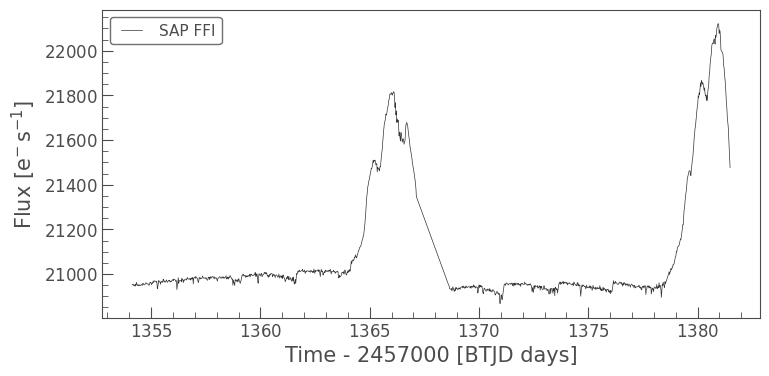

In [84]:
ffi_lc.plot(label="SAP FFI")

Looking at the above light curve, we can see two dominant peaks and observe that the flux in the aperture is dominated by what is known as scattered light. We can tell this because *TESS* orbits Earth twice in each sector, thus patterns which appear twice within a sector are typically related to *TESS’* orbit (such as the scattered light effect).

We will discuss this issue in more detail below.

## 3. How to analyze and assess various data anomalies and how you might visualize them

Lets take a look at the SAP light curves derived from our FFI data and the PDCSAP light curve derived from our Light Curve File.


In [85]:
# add other target back in
search_lcf_refined = lk.search_lightcurve('L 98-59', author="SPOC", exptime=120)
lcf = search_lcf_refined.download_all()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

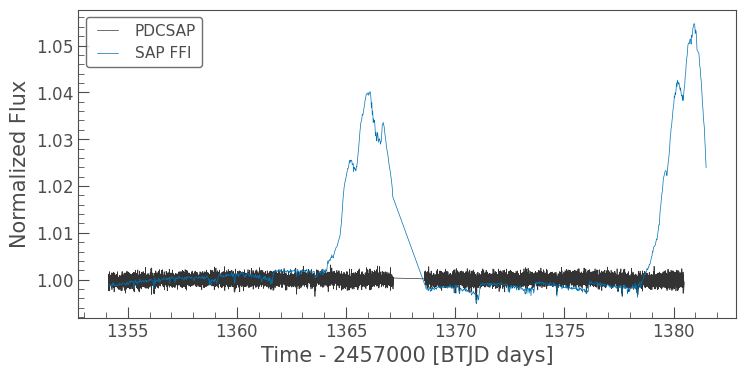

In [86]:
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP");
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

Looking at the figure above, you can see that the SAP light curve has a long-term change in brightness that has been removed in the PDCSAP light curve, while keeping the transits at the same depth. For most inspections, a PDCSAP light curve is what you want to use, but when looking at astronomical phenomena that aren't planets (e.g. long-term variability), the SAP flux may be preferred. 

The primary source of noise removed from the SAP light curve is that of scattered light. Each of TESS's cameras has a lens hood to reduce the scattered light from the Earth and the Moon. Due to TESS's wide field of view and the physical restrictions of the Sun shade, the lens hood is not 100% efficient. The effect of the scattered light on the CCD's can be seen in this [video](https://www.youtube.com/watch?v=SP4QSF9G6FA).

### Interactive inspection:

By interactively inspecting the area around your object of interest, you can see when scattered light comes into play, and also how it effects the light curve. To do this, we use the `interact()` function.

In [87]:
ffi_data.interact()

You can move the large bottom left slider to change the location of the vertical red bar, which indicates which cadence is being shown in the TPF postage stamp image. The slider beneath the TPF postage stamp image controls the screen stretch, which defaults to logarithmic scaling initialized to 1% and 95% lower and upper limits respectively.

You can move your cursor over individual data points to show hover-over tooltips indicating additional information about that datum. Currently, the tooltips list the cadence, time, flux, and quality flags. The tools on the right hand side of the plots enable zooming and pixel selection.

Interaction modes:

- Clicking on a single pixel shows the time series light curve of that pixel alone.
- Shift-clicking on multiple pixels shows the light curve using that pixel mask.
- Shift-clicking on an already selected pixel will deselect that pixel.
- Clicking and dragging a box will make a rectangular aperture mask — individual pixels can be deselected from this mask by shift-clicking (box deselecting does not work).
- The screen stretch high and low limits can be changed independently by clicking and dragging each end, or simultaneously by clicking and dragging in the middle.
- The cadence slider updates the postage stamp image at the position of the vertical red bar in the light curve.
- Clicking on a position in the light curve automatically seeks to that cadence number.
- The left and right arrows can be clicked to increment the cadence number by one.
- The interact() tool works for *TESS* data and *Kepler/K2*. 

This tool can also be used to see how crowded the field of your sources is and if anything else unusual happened during observation.

### Interact Sky:

*Lightkurve* has an additional tool to interactively inspect target pixel files — `.interact_sky`. This method brings up a single frame of the target pixel file with targets identified by Gaia marked by red circles. The size of the circle scales with the magnitude of the target, where brighter sources are larger and fainter sources are smaller. Using your cursor, you can hover over the red circles to display useful information from Gaia, including its Gaia ID, G band magnitude, and coordinates.

In [25]:
ffi_data.interact_sky()

/Users/rhounsel/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/lightkurve/interact.py:517: LightkurveWarning: Proper motion correction cannot be applied to the target, as none is available. Thus the target (the cross) might be noticeably away from its actual position, if it has large proper motion.
  category=LightkurveWarning)


This tool is useful for crowded sources. 

### Cadence Quality Flags:

The *TESS* pipeline populates a series of quality flags to indicate when a cadence may have been taken during an anomalous event.  These flags are available in the Light Curve Files, the Target Pixel Files, and a subset are available for the FFIs. 

### Aperture Mask Image Flags:

The Light Curve Files and Target Pixel Files contain an image in the **APERTURE FITS** extension that describes how each pixel was used in the processing. 

Tables of these flags can be found [here](https://outerspace.stsci.edu/display/TESS/2.0+-+Data+Product+Overview#id-2.0DataProductOverview-Table:CadenceQualityFlags), where a description of each flag is provided.

## Additional Resources 

In this tutorial, we have covered the basics of how to obtain, reduce and analyze *TESS* data using *Lightkurve*. We have, however, only skimmed the surface of what *Lightkurve* can do and how to investigate the data. For more detailed tutorials as well as other useful tools, please visit the following pages.

- [*Lightkurve Tutorials page*](https://docs.lightkurve.org/tutorials/index.html): A set of 21 tutorials dealing with Kepler/K2 and TESS data
- [TESS GI data products page](https://heasarc.gsfc.nasa.gov/docs/tess/data-analysis-tools.html): A set of 7 TESS specific tutorials.
- [STScI Kepler K3 notebooks](https://github.com/spacetelescope/notebooks/tree/master/notebooks/MAST/Kepler): A set of notebooks produced by a collaboration between NumFocus, MAST, *Lightkurve*, and TESS GI office. They make use of python astronomical data packages to demonstrate how to analyze time series data from these NASA missions. New tools are presented here and techniques for the advanced user.
